In [192]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [193]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(5,3,bias=True),
            nn.Sigmoid(),
            nn.Linear(3,1,bias=True),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.net(x)

In [194]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [195]:
class CreditRiskDataset():
    def __init__(self,num_samples):
        self.X=np.random.randint(0,2,(num_samples,5)).astype(np.float32)
        self.y=((np.sum(self.X==0, axis=1)>=3)|
                ((self.X[:,0]==0)&(self.X[:,1]==0)) |
                ((self.X[:,1]==0)& (self.X[:,4]==0))).astype(np.float32)
        self.y=self.y.reshape(-1,1)
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return torch.tensor(self.X[idx]),torch.tensor(self.y[idx])

In [196]:
train_dataset=CreditRiskDataset(1000)
train_loader=DataLoader(train_dataset,batch_size=4,shuffle=True)
test_dataset=CreditRiskDataset(200)
test_loader=DataLoader(test_dataset,batch_size=4,shuffle=True)
model=MyModel()
# model.to(device)
criterion=nn.BCELoss()
optimizer=optim.SGD(model.parameters(),lr=0.001)

In [197]:
loss_list=[]

In [198]:
def train_one_epoch(epoch_index):
    totalLoss = 0
    
    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        totalLoss += loss.item()
        
    return totalLoss/(len(train_loader)*4)

In [199]:
EPOCHS = 100

for epoch in range(EPOCHS):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    
    if(epoch%10 == 0):
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

Epoch 0/100, Loss: 0.18462874084711076
Epoch 10/100, Loss: 0.17178050965070724
Epoch 20/100, Loss: 0.1699253049492836
Epoch 30/100, Loss: 0.16887781661748885
Epoch 40/100, Loss: 0.1677718693614006
Epoch 50/100, Loss: 0.1665139072537422
Epoch 60/100, Loss: 0.16506956273317336
Epoch 70/100, Loss: 0.16342072319984435
Epoch 80/100, Loss: 0.16155494463443756
Epoch 90/100, Loss: 0.15946467661857605


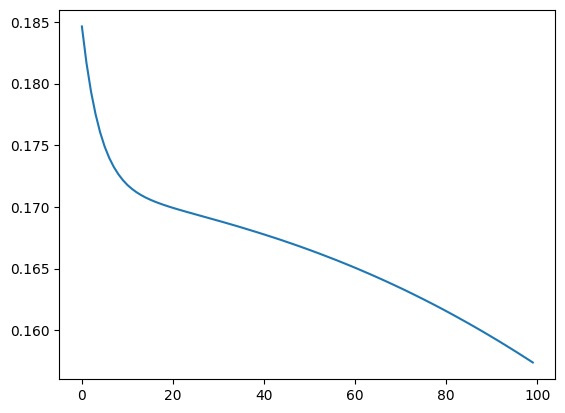

In [200]:
plt.plot(loss_list)

In [201]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in train_loader:
        outputs = model(inputs)
        # outputs = torch.sigmoid(outputs)  # If using BCEWithLogitsLoss
        preds = torch.round(outputs)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

final_accuracy = (correct / total) * 100
print(f"Final Accuracy after {EPOCHS} epochs: {final_accuracy:.2f}%")

Final Accuracy after 100 epochs: 60.30%


In [202]:
def train_one_epoch_vali(epoch_index):
    totalLoss = 0
    
    for i, data in enumerate(test_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        totalLoss += loss.item()
        
    return totalLoss/(len(test_loader)*4)

In [203]:
EPOCHS = 100

for epoch in range(EPOCHS):
    model.train(True)
    avg_loss = train_one_epoch_vali(epoch)
    loss_list.append(avg_loss)
    
    if(epoch%10 == 0):
        print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')

Epoch 0/100, Loss: 0.15717122048139573
Epoch 10/100, Loss: 0.1565977692604065
Epoch 20/100, Loss: 0.15603409498929977
Epoch 30/100, Loss: 0.15546585664153098
Epoch 40/100, Loss: 0.15489066302776336
Epoch 50/100, Loss: 0.15431347995996475
Epoch 60/100, Loss: 0.15372566401958465
Epoch 70/100, Loss: 0.1531371733546257
Epoch 80/100, Loss: 0.15253033250570297
Epoch 90/100, Loss: 0.15191557228565217


In [205]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for inputs, labels in test_loader:
        outputs = model(inputs)
        # outputs = torch.sigmoid(outputs)  # If using BCEWithLogitsLoss
        preds = torch.round(outputs)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

final_accuracy = (correct / total) * 100
print(f"Final Accuracy after {EPOCHS} epochs: {final_accuracy:.2f}%")

Final Accuracy after 100 epochs: 81.50%


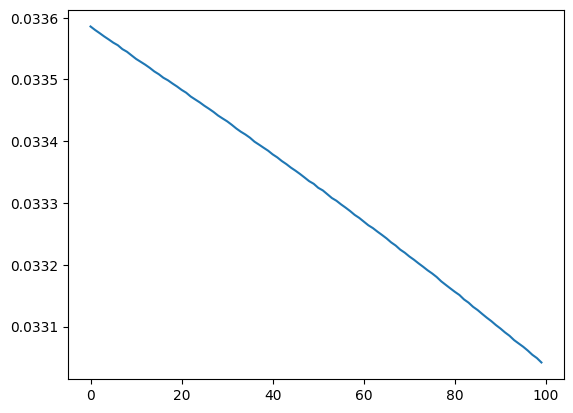

In [204]:
plt.plot(temp)

In [206]:
print(torch.__version__)

2.5.1+cu118


In [207]:
torch

<module 'torch' from '/home/student/Documents/220962334/myvenv/lib/python3.12/site-packages/torch/__init__.py'>

Using device: cuda


ValueError: num_samples should be a positive integer value, but got num_samples=0